<strong>Analytics India Magazine and IMS Proschool - ‘Predicting Food Delivery Time Hackathon’.</strong>

This data is from thousands of restaurants in India regarding the time they take to deliver food for online order. As data scientists, the goal is to predict the online order delivery time based on the given factors.

Size of training set: 11,094 records

Size of test set: 2,774 records

FEATURES:

- Restaurant: A unique ID that represents a restaurant.
- Location: The location of the restaurant.
- Cuisines: The cuisines offered by the restaurant.
- Average_Cost: The average cost for one person/order.
- Minimum_Order: The minimum order amount.
- Rating: Customer rating for the restaurant.
- Votes: The total number of customer votes for the restaurant.
- Reviews: The number of customer reviews for the restaurant.
- Delivery_Time: The order delivery time of the restaurant.(Target Classes)

# Imports

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from collections import Counter

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_rows = 2000
pd.options.display.max_columns = 200

import warnings
warnings.filterwarnings('ignore')

# Data Loads

In [2]:
train_data = pd.read_excel(r"..\data\raw\Data_Train.xlsx")
test_data = pd.read_excel(r"..\data\raw\Data_Test.xlsx")

train_data.columns = [x.lower() for x in train_data.columns]
test_data.columns = [x.lower() for x in test_data.columns]

## Adding Train and Test Data

In [3]:
train_data['data_category'] = 'train'
test_data['data_category'] = 'test'

In [4]:
train_data.head()

,restaurant,location,cuisines,average_cost,minimum_order,rating,votes,reviews,delivery_time,data_category
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,train
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,train
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,train
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,train
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,train


In [5]:
df = pd.concat([train_data, test_data], ignore_index=True)

df = df[train_data.columns]

In [6]:
df.drop(['restaurant'], axis=1, inplace=True)

In [7]:
df.head()

,location,cuisines,average_cost,minimum_order,rating,votes,reviews,delivery_time,data_category
0,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,train
1,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,train
2,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,train
3,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,train
4,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,train


In [8]:
df.dtypes

location         object
cuisines         object
average_cost     object
minimum_order    object
rating           object
votes            object
reviews          object
delivery_time    object
data_category    object
dtype: object

# Data Cleaning

## Preprocessing Function

Function to extract only string value, other values will be replaced as NaNs.

In [9]:
def string_val(x):
    try:
        x = float(x)
        if isinstance(x,float):
            x = np.nan
    except:
        pass    
    return x

Function to extract only float value, other values will be replaced as NaNs.

In [10]:
def float_val(x):
    try:
        x = float(x)
    except:
        x = np.nan
    return x

## Average Cost

In [11]:
import re

df['average_cost'] = df['average_cost'].apply(lambda x: ".".join(re.findall("\d+", str(x))))

In [12]:
df['average_cost'].value_counts()

200      4061
100      3221
150      3051
250      1104
300       710
350       354
400       346
50        337
600       184
500       116
550        73
450        72
650        63
800        50
750        41
700        19
1.000      16
850        16
900        15
1.200      10
950         4
1.150       1
1.100       1
1.400       1
2.050       1
            1
Name: average_cost, dtype: int64

In [13]:
df['average_cost'].dtypes

dtype('O')

In [14]:
df['float_val'] = df['average_cost'].apply(float_val)

df['string_val'] = df['average_cost'].apply(string_val)

In [15]:
df['float_val'].value_counts()

200.00    4061
100.00    3221
150.00    3051
250.00    1104
300.00     710
350.00     354
400.00     346
50.00      337
600.00     184
500.00     116
550.00      73
450.00      72
650.00      63
800.00      50
750.00      41
700.00      19
850.00      16
1.00        16
900.00      15
1.20        10
950.00       4
1.10         1
2.05         1
1.40         1
1.15         1
Name: float_val, dtype: int64

In [16]:
df[df['float_val']<10].head(10)

,location,cuisines,average_cost,minimum_order,rating,votes,reviews,delivery_time,data_category,float_val,string_val
225,"Nathan Road, Mangaldas Road, Pune","Chinese, Cantonese",1.000,₹50,4.7,441,259,30 minutes,train,1.00,NaN
822,"Mico Layout, Stage 2, BTM Layout,Bangalore","Italian, Salad",1.000,₹50,4.3,1276,671,45 minutes,train,1.00,NaN
1296,"Delhi High Court, India Gate",North Indian,1.200,₹50,3.8,175,94,45 minutes,train,1.20,NaN
2280,"Yerawada, Pune, Maharashtra","Chinese, Cantonese",1.000,₹50,4.7,441,259,30 minutes,train,1.00,NaN
3030,"Laxman Vihar Industrial Area, Sector 3A, Gurgoan",Japanese,1.000,₹50,3.8,32,17,30 minutes,train,1.00,NaN
3185,Mumbai Central,"American, Mexican, Burger, Tex-Mex",1.000,₹50,4.1,2866,1961,45 minutes,train,1.00,NaN
3868,"Moulali, Kolkata","Italian, Continental",1.200,₹50,4.0,655,358,30 minutes,train,1.20,NaN
3982,Mumbai Central,Chinese,1.000,₹50,4.2,687,274,30 minutes,train,1.00,NaN
4213,Mumbai Central,"European, North Indian, Continental",1.200,₹50,4.1,1446,500,45 minutes,train,1.20,NaN
5712,"Rmz Centennial, I Gate, Whitefield",North Indian,1.150,₹50,4.6,1038,774,30 minutes,train,1.15,NaN


Looking at the cuisines served at these restaurants, we can infer that the average cost must be mentioned in thousands unit. Hence, multiplying the average cost by 1000 at these restaurant.

In [17]:
df['avg_cost_main'] = df['float_val'].apply(lambda x: x*1000 if x<10 else x) 

df['average_cost'] = df['avg_cost_main']

df.drop(['avg_cost_main','float_val','string_val'], axis=1, inplace=True)

df.dtypes

location          object
cuisines          object
average_cost     float64
minimum_order     object
rating            object
votes             object
reviews           object
delivery_time     object
data_category     object
dtype: object

## Minimum Order

In [18]:
df['minimum_order'] = df['minimum_order'].apply(lambda x: ".".join(re.findall("\d+", str(x))))

In [19]:
df['minimum_order'].isnull().sum()

0

In [20]:
df['minimum_order'] = df['minimum_order'].astype(float)

In [21]:
df.dtypes

location          object
cuisines          object
average_cost     float64
minimum_order    float64
rating            object
votes             object
reviews           object
delivery_time     object
data_category     object
dtype: object

In [22]:
df.isnull().sum()

location            0
cuisines            0
average_cost        1
minimum_order       0
rating              0
votes               0
reviews             0
delivery_time    2774
data_category       0
dtype: int64

## Rating

In [23]:
df['rating'].value_counts()

-                     1496
3.7                   1081
3.6                   1069
3.5                   1015
3.8                    983
3.9                    965
NEW                    958
3.4                    903
3.3                    828
4.0                    755
3.2                    640
4.1                    574
3.1                    531
3.0                    367
4.2                    342
4.3                    299
2.9                    256
2.8                    198
4.4                    171
2.7                     98
4.5                     96
2.6                     51
4.6                     48
4.7                     42
2.5                     33
2.4                     18
4.8                     16
Opening Soon            14
2.3                      8
4.9                      8
Temporarily Closed       2
2.1                      2
2.2                      1
Name: rating, dtype: int64

In [24]:
df['float_val'] = df['rating'].apply(float_val)

df['string_val'] = df['rating'].apply(string_val)

In [25]:
df['string_val'].value_counts()

-                     1496
NEW                    958
Opening Soon            14
Temporarily Closed       2
Name: string_val, dtype: int64

Lets look at subsets of dataframe corresponding to these string values.

In [26]:
df['rating'] = df['float_val']

In [27]:
df.drop(['float_val','string_val'],axis=1, inplace=True)

In [28]:
df.isnull().sum()

location            0
cuisines            0
average_cost        1
minimum_order       0
rating           2470
votes               0
reviews             0
delivery_time    2774
data_category       0
dtype: int64

## Votes

In [29]:
df['votes'].value_counts().head()

-    2616
4     298
6     255
7     242
9     238
Name: votes, dtype: int64

In [30]:
df['votes'] = df['votes'].apply(float_val)

In [31]:
df['votes'].isnull().sum()

2616

## Reviews

In [32]:
df['reviews'].value_counts().head()

-    2905
2     551
1     483
3     466
4     428
Name: reviews, dtype: int64

In [33]:
df['reviews'] = df['reviews'].apply(float_val)

In [34]:
df['reviews'].isnull().sum()

2905

In [37]:
train = df[df['data_category']=='train'].drop(['data_category'], axis=1)

In [38]:
train.shape

(11094, 8)

# Imputation

In [39]:
df.isnull().sum()

location            0
cuisines            0
average_cost        1
minimum_order       0
rating           2470
votes            2616
reviews          2905
delivery_time    2774
data_category       0
dtype: int64

In [40]:
df.head()

,location,cuisines,average_cost,minimum_order,rating,votes,reviews,delivery_time,data_category
0,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200.0,50.0,3.5,12.0,4.0,30 minutes,train
1,"Sector 3, Marathalli","Ice Cream, Desserts",100.0,50.0,3.5,11.0,4.0,30 minutes,train
2,Mumbai Central,"Italian, Street Food, Fast Food",150.0,50.0,3.6,99.0,30.0,65 minutes,train
3,"Sector 1, Noida","Mughlai, North Indian, Chinese",250.0,99.0,3.7,176.0,95.0,30 minutes,train
4,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200.0,99.0,3.2,521.0,235.0,65 minutes,train


## Average Cost

In [41]:
df[df['average_cost'].isna()]

,location,cuisines,average_cost,minimum_order,rating,votes,reviews,delivery_time,data_category
6297,Pune University,Fast Food,NaN,50.0,NaN,NaN,NaN,30 minutes,train


In [42]:
df['average_cost'] = df['average_cost'].fillna(df[df['location']=='Pune University']['average_cost'].median())

In [43]:
df.isnull().sum()

location            0
cuisines            0
average_cost        0
minimum_order       0
rating           2470
votes            2616
reviews          2905
delivery_time    2774
data_category       0
dtype: int64

## Rating

In [44]:
df[df['rating'].isna()]

,location,cuisines,average_cost,minimum_order,rating,votes,reviews,delivery_time,data_category
12,"Sector 1, Noida","Burger, Fast Food, Desserts, Beverages",150.0,50.0,NaN,NaN,NaN,30 minutes,train
16,"Sector 1, Noida",Italian,100.0,50.0,NaN,NaN,NaN,30 minutes,train
18,Pune University,"Kerala, Bihari",150.0,50.0,NaN,NaN,NaN,30 minutes,train
25,"Mico Layout, Stage 2, BTM Layout,Bangalore","Desserts, Ice Cream",100.0,50.0,NaN,NaN,NaN,45 minutes,train
47,"Mico Layout, Stage 2, BTM Layout,Bangalore",Chinese,200.0,50.0,NaN,NaN,NaN,30 minutes,train
...,...,...,...,...,...,...,...,...,...
13849,"MG Road, Pune","North Indian, Maharashtrian, Chinese",300.0,50.0,NaN,NaN,NaN,NaN,test
13851,"Sector 14, Noida",North Indian,100.0,50.0,NaN,NaN,NaN,NaN,test
13853,"FTI College, Law College Road, Pune","Rolls, Fast Food",150.0,50.0,NaN,NaN,NaN,NaN,test
13855,"Panjetan Colony, Malakpet, Hyderabad",Bakery,150.0,50.0,NaN,NaN,NaN,NaN,test


In [45]:
df[(df['rating'].notna()) & (df['votes'].isna())]

,location,cuisines,average_cost,minimum_order,rating,votes,reviews,delivery_time,data_category
82,"D-Block, Sector 63, Noida","North Indian, Mughlai",150.0,50.0,3.3,NaN,NaN,30 minutes,train
88,"Rmz Centennial, I Gate, Whitefield","Biryani, Hyderabadi, North Indian, Mughlai",100.0,50.0,2.6,NaN,NaN,30 minutes,train
114,"MG Road, Pune","North Indian, Chinese, Street Food",150.0,50.0,2.8,NaN,NaN,30 minutes,train
122,Delhi Cantt.,North Indian,300.0,50.0,4.2,NaN,NaN,45 minutes,train
173,"Rmz Centennial, I Gate, Whitefield","Ice Cream, Desserts",200.0,50.0,4.1,NaN,NaN,30 minutes,train
226,"Delhi Administration Flats, Timarpur","North Eastern, Momos, Fast Food, Beverages, Ti...",100.0,50.0,2.9,NaN,NaN,30 minutes,train
264,"Babarpur, New Delhi, Delhi","North Eastern, Momos, Fast Food, Beverages, Ti...",100.0,50.0,2.9,NaN,NaN,30 minutes,train
361,"Sector 3, Marathalli","North Indian, Mughlai",150.0,50.0,2.8,NaN,NaN,30 minutes,train
389,"Mico Layout, Stage 2, BTM Layout,Bangalore",Desserts,150.0,50.0,3.7,NaN,NaN,30 minutes,train
535,Delhi University-GTB Nagar,"North Indian, Thai, Goan, Mughlai, Seafood",200.0,99.0,4.1,NaN,NaN,30 minutes,train


In [46]:
df[(df['rating'].notna()) & (df['reviews'].isna())]

,location,cuisines,average_cost,minimum_order,rating,votes,reviews,delivery_time,data_category
82,"D-Block, Sector 63, Noida","North Indian, Mughlai",150.0,50.0,3.3,NaN,NaN,30 minutes,train
88,"Rmz Centennial, I Gate, Whitefield","Biryani, Hyderabadi, North Indian, Mughlai",100.0,50.0,2.6,NaN,NaN,30 minutes,train
114,"MG Road, Pune","North Indian, Chinese, Street Food",150.0,50.0,2.8,NaN,NaN,30 minutes,train
115,"FTI College, Law College Road, Pune",Fast Food,150.0,50.0,3.0,4.0,NaN,30 minutes,train
122,Delhi Cantt.,North Indian,300.0,50.0,4.2,NaN,NaN,45 minutes,train
172,"FTI College, Law College Road, Pune",North Indian,150.0,50.0,3.1,4.0,NaN,30 minutes,train
173,"Rmz Centennial, I Gate, Whitefield","Ice Cream, Desserts",200.0,50.0,4.1,NaN,NaN,30 minutes,train
226,"Delhi Administration Flats, Timarpur","North Eastern, Momos, Fast Food, Beverages, Ti...",100.0,50.0,2.9,NaN,NaN,30 minutes,train
241,"Babarpur, New Delhi, Delhi","North Indian, Fast Food",100.0,50.0,3.3,10.0,NaN,30 minutes,train
264,"Babarpur, New Delhi, Delhi","North Eastern, Momos, Fast Food, Beverages, Ti...",100.0,50.0,2.9,NaN,NaN,30 minutes,train


In [47]:
df['rating'].mean()

3.6107913669064753

In [48]:
df['rating'].median()

3.6

In [49]:
df['is_rating'] = df['rating'].apply(lambda x: 1 if x>0 else 0)

In [50]:
df['is_rating'].value_counts()

1    11398
0     2470
Name: is_rating, dtype: int64

In [51]:
df['rating'].fillna(1, inplace=True)

We'll impute the rating with median rating for each location.

In [52]:
# df['rating'] = df.groupby(['location'])['rating'].transform(lambda x: x.fillna(x.median()))

In [53]:
df.isnull().sum()

location            0
cuisines            0
average_cost        0
minimum_order       0
rating              0
votes            2616
reviews          2905
delivery_time    2774
data_category       0
is_rating           0
dtype: int64

## Votes and Reviews

In [54]:
df[['location','votes','reviews']].groupby(['location']).corr()

votes   reviews
location                                                                    
BTM Layout 1, Electronic City                    votes    1.000000  0.954751
                                                 reviews  0.954751  1.000000
Babarpur, New Delhi, Delhi                       votes    1.000000  0.871425
                                                 reviews  0.871425  1.000000
Chandni Chowk, Kolkata                           votes    1.000000  0.973620
                                                 reviews  0.973620  1.000000
Chatta Bazaar, Malakpet, Hyderabad               votes    1.000000  0.812843
                                                 reviews  0.812843  1.000000
D-Block, Sector 63, Noida                        votes    1.000000  0.934380
                                                 reviews  0.934380  1.000000
Delhi Administration Flats, Timarpur             votes    1.000000  0.953744
                                                 reviews  0.953744  1.000000
Delhi Cantt.                                     votes    1.000000  0.968151
                                                 reviews  0.968151  1.000000
Delhi High Court, India Gate                     votes    1.000000  0.985194
                                                 reviews  0.985194  1.000000
Delhi University-GTB Nagar                       votes    1.000000  0.949027
                                                 reviews  0.949027  1.000000
Dockyard Road, Mumbai CST Area                   votes    1.000000  0.986942
                                                 reviews  0.986942  1.000000
FTI College, Law College Road, Pune              votes    1.000000  0.974883
                                                 reviews  0.974883  1.000000
Gora Bazar, Rajbari, North Dumdum, Kolkata       votes    1.000000  0.833911
                                                 reviews  0.833911  1.000000
Hyderabad Public School, Begumpet                votes    1.000000  0.787384
                                                 reviews  0.787384  1.000000
Jaya Nagar, Saidabad, Hyderabad                  votes    1.000000  0.630721
                                                 reviews  0.630721  1.000000
Laxman Vihar Industrial Area, Sector 3A, Gurgoan votes    1.000000  0.942517
                                                 reviews  0.942517  1.000000
MG Road, Pune                                    votes    1.000000  0.989881
                                                 reviews  0.989881  1.000000
Majestic                                         votes    1.000000  0.963656
                                                 reviews  0.963656  1.000000
Mico Layout, Stage 2, BTM Layout,Bangalore       votes    1.000000  0.962468
                                                 reviews  0.962468  1.000000
Moulali, Kolkata                                 votes    1.000000  0.974356
                                                 reviews  0.974356  1.000000
Mumbai Central                                   votes    1.000000  0.980950
                                                 reviews  0.980950  1.000000
Musi Nagar, Malakpet, Hyderabad                  votes    1.000000  0.702230
                                                 reviews  0.702230  1.000000
Nathan Road, Mangaldas Road, Pune                votes    1.000000  0.982936
                                                 reviews  0.982936  1.000000
Noorkhan Bazaar, Malakpet, Hyderabad             votes    1.000000  0.813334
                                                 reviews  0.813334  1.000000
Panjetan Colony, Malakpet, Hyderabad             votes    1.000000  0.809031
                                                 reviews  0.809031  1.000000
Pune University                                  votes    1.000000  0.980412
                                                 reviews  0.980412  1.000000
Raja Bazar, Kolkata                              votes   

We can infer that the number of reviews and votes are highly correlated to eachother, serving us no purpose to keep 'reviews' in the dataset. 

In [55]:
df.drop(['reviews'], axis=1, inplace=True)

Since, we have imputed the number of reviews, we can impute the number of votes with 1 i.e. least number of votes. 

In [56]:
df['is_votes'] = df['votes'].apply(lambda x: 1 if x>0 else 0)

In [57]:
df['votes'] = df['votes'].fillna(1)

In [58]:
df.isnull().sum()

location            0
cuisines            0
average_cost        0
minimum_order       0
rating              0
votes               0
delivery_time    2774
data_category       0
is_rating           0
is_votes            0
dtype: int64

# Feature Engineering

In [59]:
df

,location,cuisines,average_cost,minimum_order,rating,votes,delivery_time,data_category,is_rating,is_votes
0,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200.0,50.0,3.5,12.0,30 minutes,train,1,1
1,"Sector 3, Marathalli","Ice Cream, Desserts",100.0,50.0,3.5,11.0,30 minutes,train,1,1
2,Mumbai Central,"Italian, Street Food, Fast Food",150.0,50.0,3.6,99.0,65 minutes,train,1,1
3,"Sector 1, Noida","Mughlai, North Indian, Chinese",250.0,99.0,3.7,176.0,30 minutes,train,1,1
4,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200.0,99.0,3.2,521.0,65 minutes,train,1,1
...,...,...,...,...,...,...,...,...,...,...
13863,Delhi University-GTB Nagar,"Fast Food, Chinese",100.0,50.0,1.0,1.0,NaN,test,0,0
13864,"Mico Layout, Stage 2, BTM Layout,Bangalore","Continental, North Indian, Desserts, Beverages",250.0,50.0,3.1,5.0,NaN,test,1,1
13865,"Noorkhan Bazaar, Malakpet, Hyderabad","Andhra, South Indian",150.0,50.0,3.0,16.0,NaN,test,1,1
13866,"D-Block, Sector 63, Noida",Bakery,100.0,99.0,3.0,7.0,NaN,test,1,1


## Average Cost Categorical

In [60]:
df['average_cost_cat'] = df['average_cost'].apply(lambda x: 0 if x<250 else 1)

## Minimum Order Categorical

In [61]:
df['minimum_order_less_50'] = df['minimum_order'].apply(lambda x: 0 if x<=50 else 1)

## Rating Categorical

Analysing these subset dataframes, we can create another feature - 'is_rating' which has binary values 1 and 0 signifying with rating and without rating respectively. Also, keeping rating column with numeric values only.

In [62]:
df['rating_cat'] = np.where((df['rating']<3),"less_3",
                            np.where(((df['rating']>=3) & (df['rating']<4)),"3_to_3.9","greater_equal_4"))

In [63]:
df.isnull().sum()

location                    0
cuisines                    0
average_cost                0
minimum_order               0
rating                      0
votes                       0
delivery_time            2774
data_category               0
is_rating                   0
is_votes                    0
average_cost_cat            0
minimum_order_less_50       0
rating_cat                  0
dtype: int64

## Cuisines

In [64]:
df['cuisines'].value_counts()

North Indian                                         1076
North Indian, Chinese                                 786
Fast Food                                             553
South Indian                                          336
Chinese                                               303
                                                     ... 
North Indian, Tea                                       1
Healthy Food, Fast Food, Beverages                      1
Cafe, Continental, Asian                                1
Chinese, Rolls, Burger, South Indian, Street Food       1
Mithai, Fast Food, South Indian                         1
Name: cuisines, Length: 2392, dtype: int64

### Method - 1

In [65]:
cuisines = df[['cuisines']]

In [66]:
cuisines['list'] = cuisines['cuisines'].apply(lambda x: x.split(', '))

cuisines['cui_len'] = cuisines['list'].apply(lambda x: len(x))

In [67]:
cuisines['cui_len'].value_counts()

2    4907
1    3785
3    3066
4    1316
5     498
6     156
7      85
8      55
Name: cui_len, dtype: int64

In [68]:
cuisines.head()

,cuisines,list,cui_len
0,"Fast Food, Rolls, Burger, Salad, Wraps","[Fast Food, Rolls, Burger, Salad, Wraps]",5
1,"Ice Cream, Desserts","[Ice Cream, Desserts]",2
2,"Italian, Street Food, Fast Food","[Italian, Street Food, Fast Food]",3
3,"Mughlai, North Indian, Chinese","[Mughlai, North Indian, Chinese]",3
4,"Cafe, Beverages","[Cafe, Beverages]",2


In [69]:
cuisines = pd.concat([cuisines, cuisines['cuisines'].str.split(pat=', ', expand=True)], axis=1)

In [70]:
cuisines.head()

,cuisines,list,cui_len,0,1,2,3,4,5,6,7
0,"Fast Food, Rolls, Burger, Salad, Wraps","[Fast Food, Rolls, Burger, Salad, Wraps]",5,Fast Food,Rolls,Burger,Salad,Wraps,None,None,None
1,"Ice Cream, Desserts","[Ice Cream, Desserts]",2,Ice Cream,Desserts,None,None,None,None,None,None
2,"Italian, Street Food, Fast Food","[Italian, Street Food, Fast Food]",3,Italian,Street Food,Fast Food,None,None,None,None,None
3,"Mughlai, North Indian, Chinese","[Mughlai, North Indian, Chinese]",3,Mughlai,North Indian,Chinese,None,None,None,None,None
4,"Cafe, Beverages","[Cafe, Beverages]",2,Cafe,Beverages,None,None,None,None,None,None


In [71]:
cuisines['cuisines'].apply(lambda x: x.split(', '))

0                [Fast Food, Rolls, Burger, Salad, Wraps]
1                                   [Ice Cream, Desserts]
2                       [Italian, Street Food, Fast Food]
3                        [Mughlai, North Indian, Chinese]
4                                       [Cafe, Beverages]
                               ...                       
13863                                [Fast Food, Chinese]
13864    [Continental, North Indian, Desserts, Beverages]
13865                              [Andhra, South Indian]
13866                                            [Bakery]
13867                   [Italian, Street Food, Fast Food]
Name: cuisines, Length: 13868, dtype: object

Let's see all the different types of cuisines that are present in dataset.

In [72]:
all_cuisines = list(cuisines['list'])

In [73]:
all_cuisines = [item for elem in all_cuisines for item in elem]

In [74]:
all_cuisines_uniq = dict(Counter(all_cuisines))

In [75]:
all_cuisines_uniq

{'Fast Food': 3862,
 'Rolls': 620,
 'Burger': 414,
 'Salad': 284,
 'Wraps': 97,
 'Ice Cream': 480,
 'Desserts': 1548,
 'Italian': 751,
 'Street Food': 935,
 'Mughlai': 1098,
 'North Indian': 5999,
 'Chinese': 4339,
 'Cafe': 592,
 'Beverages': 1789,
 'South Indian': 1507,
 'Thai': 205,
 'Asian': 259,
 'Mithai': 386,
 'Momos': 397,
 'Indonesian': 3,
 'Biryani': 1161,
 'Kerala': 73,
 'Bihari': 14,
 'Mexican': 143,
 'Japanese': 72,
 'Bakery': 864,
 'Burmese': 13,
 'Bubble Tea': 6,
 'Tea': 87,
 'Pizza': 611,
 'Lucknowi': 15,
 'Mangalorean': 27,
 'European': 89,
 'Continental': 694,
 'Sandwich': 339,
 'Healthy Food': 352,
 'Bengali': 132,
 'American': 163,
 'Mishti': 82,
 'Hyderabadi': 85,
 'Andhra': 111,
 'Assamese': 4,
 'Maharashtrian': 135,
 'German': 9,
 'Arabian': 82,
 'Finger Food': 67,
 'Kebab': 214,
 'Chettinad': 14,
 'Seafood': 246,
 'Juices': 198,
 'Parsi': 15,
 'Sushi': 50,
 'Odia': 21,
 'Tamil': 3,
 'Cantonese': 2,
 'North Eastern': 29,
 'Tibetan': 47,
 'Lebanese': 120,
 'Spanish

Let's look at these cuisines individually and intuitively divide them into categories based on preparation time: 'fast', 'medium', 'slow'. Doing this exercise fast in excel.

In [76]:
all_cuisines_uniq_df = pd.DataFrame(list(all_cuisines_uniq.keys()))

In [77]:
all_cuisines_uniq_df.to_excel("../data/interim/unique_cuisines.xlsx", index=False)

In [78]:
all_cuisines_with_cat = pd.read_excel("../data/interim/unique_cuisines_mod.xlsx")

In [79]:
fast = list(all_cuisines_with_cat[all_cuisines_with_cat['category']=='fast']['type'])
medium = list(all_cuisines_with_cat[all_cuisines_with_cat['category']=='medium']['type'])
slow = list(all_cuisines_with_cat[all_cuisines_with_cat['category']=='slow']['type'])

In [80]:
cuisines['fast'] = cuisines['list'].apply(lambda x: len(['fast' for i in x if i in fast]))
cuisines['medium'] = cuisines['list'].apply(lambda x: len(['medium' for i in x if i in medium]))
cuisines['slow'] = cuisines['list'].apply(lambda x: len(['slow' for i in x if i in slow]))

In [81]:
cuisines.head()

,cuisines,list,cui_len,0,1,2,3,4,5,6,7,fast,medium,slow
0,"Fast Food, Rolls, Burger, Salad, Wraps","[Fast Food, Rolls, Burger, Salad, Wraps]",5,Fast Food,Rolls,Burger,Salad,Wraps,None,None,None,5,0,0
1,"Ice Cream, Desserts","[Ice Cream, Desserts]",2,Ice Cream,Desserts,None,None,None,None,None,None,2,0,0
2,"Italian, Street Food, Fast Food","[Italian, Street Food, Fast Food]",3,Italian,Street Food,Fast Food,None,None,None,None,None,2,0,1
3,"Mughlai, North Indian, Chinese","[Mughlai, North Indian, Chinese]",3,Mughlai,North Indian,Chinese,None,None,None,None,None,0,2,1
4,"Cafe, Beverages","[Cafe, Beverages]",2,Cafe,Beverages,None,None,None,None,None,None,2,0,0


In [82]:
len(cuisines[cuisines[0]=='Bakery'])
len(cuisines[cuisines[1]=='Bakery'])
len(cuisines[cuisines[2]=='Bakery'])
len(cuisines[cuisines[3]=='Bakery'])
len(cuisines[cuisines[4]=='Bakery'])
len(cuisines[cuisines[5]=='Bakery'])
len(cuisines[cuisines[6]=='Bakery'])
len(cuisines[cuisines[7]=='Bakery'])

687

99

27

14

16

15

4

2

In [83]:
# df[df['delivery_time']=='65 minutes']

In [84]:
# df[df['delivery_time']=='120 minutes']

In [85]:
# df[df['delivery_time']=='80 minutes']

In [86]:
cuisines['is_bakery_nf_'] = cuisines['list'].apply(lambda x: 1 if 'Bakery' in x else 0)

In [87]:
cuisines.head()

,cuisines,list,cui_len,0,1,2,3,4,5,6,7,fast,medium,slow,is_bakery_nf_
0,"Fast Food, Rolls, Burger, Salad, Wraps","[Fast Food, Rolls, Burger, Salad, Wraps]",5,Fast Food,Rolls,Burger,Salad,Wraps,None,None,None,5,0,0,0
1,"Ice Cream, Desserts","[Ice Cream, Desserts]",2,Ice Cream,Desserts,None,None,None,None,None,None,2,0,0,0
2,"Italian, Street Food, Fast Food","[Italian, Street Food, Fast Food]",3,Italian,Street Food,Fast Food,None,None,None,None,None,2,0,1,0
3,"Mughlai, North Indian, Chinese","[Mughlai, North Indian, Chinese]",3,Mughlai,North Indian,Chinese,None,None,None,None,None,0,2,1,0
4,"Cafe, Beverages","[Cafe, Beverages]",2,Cafe,Beverages,None,None,None,None,None,None,2,0,0,0


In [88]:
df = pd.concat([df,cuisines[['fast','medium','slow','is_bakery_nf_']]], axis=1)

In [89]:
df.drop(['cuisines'], axis=1, inplace=True)

In [90]:
df.head()

,location,average_cost,minimum_order,rating,votes,delivery_time,data_category,is_rating,is_votes,average_cost_cat,minimum_order_less_50,rating_cat,fast,medium,slow,is_bakery_nf_
0,"FTI College, Law College Road, Pune",200.0,50.0,3.5,12.0,30 minutes,train,1,1,0,0,3_to_3.9,5,0,0,0
1,"Sector 3, Marathalli",100.0,50.0,3.5,11.0,30 minutes,train,1,1,0,0,3_to_3.9,2,0,0,0
2,Mumbai Central,150.0,50.0,3.6,99.0,65 minutes,train,1,1,0,0,3_to_3.9,2,0,1,0
3,"Sector 1, Noida",250.0,99.0,3.7,176.0,30 minutes,train,1,1,1,1,3_to_3.9,0,2,1,0
4,"Rmz Centennial, I Gate, Whitefield",200.0,99.0,3.2,521.0,65 minutes,train,1,1,0,1,3_to_3.9,2,0,0,0


### Method - 2

In [ ]:
cuisines = df[['cuisines','delivery_time']]

In [ ]:
cuisines.head(2)

In [ ]:
cuisines = pd.concat([cuisines, cuisines['cuisines'].str.split(pat=', ', expand=True)], axis=1)

In [ ]:
cuisines.head(1)

In [ ]:
food_count = df[df['data_category']=='train'][['cuisines','delivery_time']]

In [ ]:
food_count['list'] = food_count['cuisines'].apply(lambda x: x.split(', '))

# cuisines['cui_len'] = cuisines['list'].apply(lambda x: len(x))

In [ ]:
food_count.head()

In [ ]:
food_count['delivery_time'].value_counts()

In [ ]:
food_count['delivery_time'].value_counts(normalize=100)*100

In [ ]:
def extending_list(df):
    df = df.copy()
    food = list(df['list'])
    food_list = [elem for items in food for elem in items]
    
    new_df = pd.DataFrame({'delivery_time':df['delivery_time'].unique()[0],
                           'food_list':food_list})
    
    return new_df

In [ ]:
food_count_2 = food_count.groupby(['delivery_time'], as_index=False).apply(extending_list).reset_index(drop=True)

In [ ]:
food_count_2['delivery_time'].value_counts(normalize=True)*100

For simplication we'll combine these categories into 4 groups:
- 30 minutes(containing 30 minutes or less)
- 45 minutes
- 60 minutes
- 80 minutes(containing 80 minutes or more)

In [ ]:
food_count_2.delivery_time.unique()

In [ ]:
food_count_2.replace(['10 minutes','20 minutes'], '30 minutes', inplace=True)
food_count_2.replace(['120 minutes'], '80 minutes', inplace=True)

In [ ]:
dt_proportion = pd.DataFrame(round(food_count_2['delivery_time'].value_counts(normalize=True)*100, 3)).reset_index()

In [ ]:
dt_proportion.rename(columns={'delivery_time':'proportion',
                             'index':'delivery_time'}, inplace=True)

In [ ]:
food_count_3 = pd.DataFrame(food_count_2.groupby(['food_list'])['delivery_time'].value_counts(normalize=True)*100).rename(columns = {'delivery_time':'count_perc'}).reset_index()

In [ ]:
food_count_3['delivery_time'].value_counts()

In [ ]:
dt_proportion

In [ ]:
dt_proportion['upper_limit'] = np.NaN

In [ ]:
dt_proportion['upper_limit'] = np.where(dt_proportion['delivery_time']=='30 minutes', dt_proportion['proportion']+3,
                                        np.where(dt_proportion['delivery_time']=='45 minutes',dt_proportion['proportion']+2,
                                                 np.where(dt_proportion['delivery_time']=='65 minutes',dt_proportion['proportion']+1,dt_proportion['proportion']+0.5)))

In [ ]:
dt_proportion

In [ ]:
food_count_3 = pd.merge(food_count_3, dt_proportion, how='left')

In [ ]:
food_count_3['check'] = food_count_3.apply(lambda row: 1 if row['count_perc']>row['upper_limit'] else 0, axis=1)

In [ ]:
def df_check(new_df):    
    df = new_df.copy()
    if df['check'].sum()==0:
        df = df.sort_values(by=['count_perc'], ascending=False).reset_index(drop=True)
        df['check'][0] = 1
    elif df['check'].sum()>1:
        df = df.sort_values(by=['count_perc'], ascending=False).reset_index(drop=True)
        df['diff'] = df['count_perc'] - df['upper_limit']
        df['check'] = np.where(df['diff'] == df['diff'].max(), 1, 0)
        df = df.drop(['diff'], axis=1)    
    return df

In [ ]:
food_count_4 = food_count_3.groupby(['food_list'], as_index=False).apply(df_check).reset_index(drop=True)

In [ ]:
food_count_4['food_list'].nunique()

In [ ]:
food_count_4['check'].sum()

In [ ]:
food_count_4

In [ ]:
freq_df = pd.pivot_table(index='food_list', columns='delivery_time', values='check', data=food_count_4).fillna(0).reset_index()

In [ ]:
freq_df.rename(columns={'30 minutes':'fast',
                        '45 minutes':'medium', '65 minutes':'slow', '80 minutes':'very_slow'}, inplace=True)

In [ ]:
df['cuisines_list'] = df['cuisines'].apply(lambda x: x.split(", "))

In [ ]:
df['cuisines'].value_counts()

In [ ]:
def cuisine_feature(new_df):
    new_df = new_df.copy().reset_index(drop=True)
    cui_list = new_df['cuisines_list'][0]
    cui_df = freq_df[freq_df['food_list'].isin(cui_list)].reset_index(drop=True)
    
    add_df = pd.DataFrame(cui_df.sum(axis=0, numeric_only=True))
    add_df[0] = add_df[0].apply(lambda x: 1 if x>=1 else 0)
    add_df = add_df.T
    
    new_df = pd.concat([new_df, add_df], axis=1)
    new_df[['fast', 'medium', 'slow', 'very_slow']] = new_df[['fast', 'medium', 'slow', 'very_slow']].ffill()
    
    return new_df

In [ ]:
df = df.groupby(['cuisines'], as_index=False).apply(cuisine_feature).reset_index(drop=True)

In [ ]:
df.drop(['cuisines', 'cuisines_list'], axis=1, inplace=True)

In [ ]:
df.head()

## Location

In [91]:
df['location'].unique()

array(['FTI College, Law College Road, Pune', 'Sector 3, Marathalli',
       'Mumbai Central', 'Sector 1, Noida',
       'Rmz Centennial, I Gate, Whitefield', 'Delhi University-GTB Nagar',
       'Yerawada, Pune, Maharashtra',
       'Delhi Administration Flats, Timarpur', 'Moulali, Kolkata',
       'Dockyard Road, Mumbai CST Area', 'Pune University',
       'Gora Bazar, Rajbari, North Dumdum, Kolkata',
       'D-Block, Sector 63, Noida', 'Sector 14, Noida',
       'Mico Layout, Stage 2, BTM Layout,Bangalore',
       'Laxman Vihar Industrial Area, Sector 3A, Gurgoan',
       'Tiretti, Kolkata', 'Sandhurst Road, Mumbai CST Area',
       'MG Road, Pune', 'Hyderabad Public School, Begumpet', 'Majestic',
       'Chandni Chowk, Kolkata', 'Delhi High Court, India Gate',
       'Chatta Bazaar, Malakpet, Hyderabad', 'Sector 63A,Gurgaon',
       'Delhi Cantt.', 'Tejas Nagar Colony, Wadala West, Mumbai',
       'Babarpur, New Delhi, Delhi', 'Nathan Road, Mangaldas Road, Pune',
       'Panjetan C

In [92]:
df['location'].nunique()

35

From location variable, we can further create a variable 'city' which contains city where the restaurants belongs.

In [93]:
# df.to_excel("../data/interim/df.xlsx", index=False)

In [94]:
city = pd.read_excel("../data/interim/df_cities.xlsx")

In [95]:
city

,location,city_nf_
0,"FTI College, Law College Road, Pune",Pune
1,"Sector 3, Marathalli",Bengaluru
2,Mumbai Central,Mumbai
3,"Sector 1, Noida",Noida
4,"Rmz Centennial, I Gate, Whitefield",Bengaluru
5,Delhi University-GTB Nagar,Delhi
6,"Yerawada, Pune, Maharashtra",Pune
7,"Delhi Administration Flats, Timarpur",Delhi
8,"Moulali, Kolkata",Kolkata
9,"Dockyard Road, Mumbai CST Area",Mumbai


In [96]:
df = pd.merge(df,city,how='left')

In [97]:
# df.head()

## Rating * Votes

In [98]:
df['rating_votes'] = df['rating']*df['votes']

In [99]:
df.head()

,location,average_cost,minimum_order,rating,votes,delivery_time,data_category,is_rating,is_votes,average_cost_cat,minimum_order_less_50,rating_cat,fast,medium,slow,is_bakery_nf_,city_nf_,rating_votes
0,"FTI College, Law College Road, Pune",200.0,50.0,3.5,12.0,30 minutes,train,1,1,0,0,3_to_3.9,5,0,0,0,Pune,42.0
1,"Sector 3, Marathalli",100.0,50.0,3.5,11.0,30 minutes,train,1,1,0,0,3_to_3.9,2,0,0,0,Bengaluru,38.5
2,Mumbai Central,150.0,50.0,3.6,99.0,65 minutes,train,1,1,0,0,3_to_3.9,2,0,1,0,Mumbai,356.4
3,"Sector 1, Noida",250.0,99.0,3.7,176.0,30 minutes,train,1,1,1,1,3_to_3.9,0,2,1,0,Noida,651.2
4,"Rmz Centennial, I Gate, Whitefield",200.0,99.0,3.2,521.0,65 minutes,train,1,1,0,1,3_to_3.9,2,0,0,0,Bengaluru,1667.2


<Figure size 1152x360 with 0 Axes>

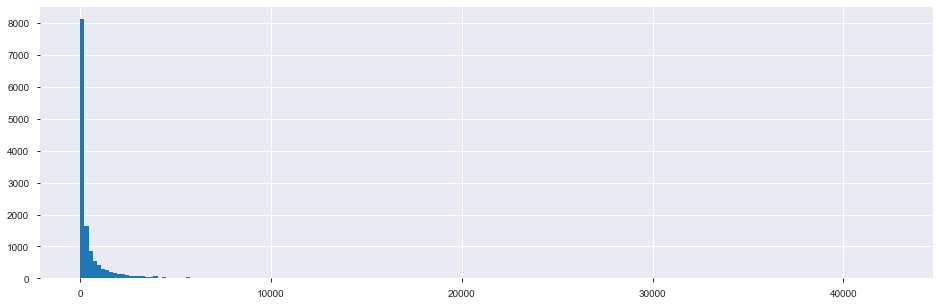

In [100]:
plt.figure(figsize=(16,5))
df['rating_votes'].hist(bins=200)

<Figure size 1152x360 with 0 Axes>

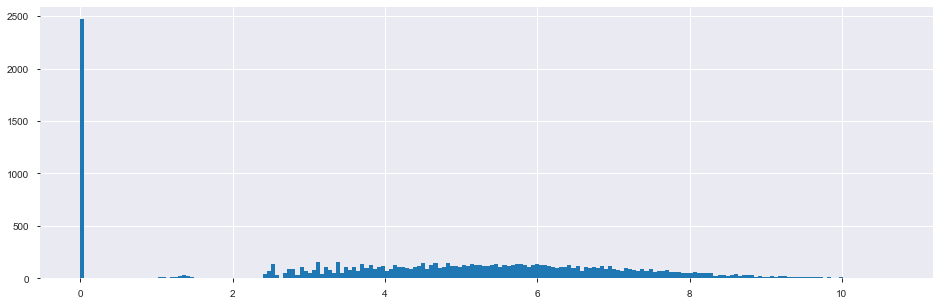

In [101]:
plt.figure(figsize=(16,5))
np.log(df['rating_votes']).hist(bins=200)

In [102]:
df['rating_votes'] = np.log(df['rating_votes'])

In [103]:
df.isnull().sum()

location                    0
average_cost                0
minimum_order               0
rating                      0
votes                       0
delivery_time            2774
data_category               0
is_rating                   0
is_votes                    0
average_cost_cat            0
minimum_order_less_50       0
rating_cat                  0
fast                        0
medium                      0
slow                        0
is_bakery_nf_               0
city_nf_                    0
rating_votes                0
dtype: int64

# Modeling Preparation

In [104]:
df.head()

,location,average_cost,minimum_order,rating,votes,delivery_time,data_category,is_rating,is_votes,average_cost_cat,minimum_order_less_50,rating_cat,fast,medium,slow,is_bakery_nf_,city_nf_,rating_votes
0,"FTI College, Law College Road, Pune",200.0,50.0,3.5,12.0,30 minutes,train,1,1,0,0,3_to_3.9,5,0,0,0,Pune,3.737670
1,"Sector 3, Marathalli",100.0,50.0,3.5,11.0,30 minutes,train,1,1,0,0,3_to_3.9,2,0,0,0,Bengaluru,3.650658
2,Mumbai Central,150.0,50.0,3.6,99.0,65 minutes,train,1,1,0,0,3_to_3.9,2,0,1,0,Mumbai,5.876054
3,"Sector 1, Noida",250.0,99.0,3.7,176.0,30 minutes,train,1,1,1,1,3_to_3.9,0,2,1,0,Noida,6.478817
4,"Rmz Centennial, I Gate, Whitefield",200.0,99.0,3.2,521.0,65 minutes,train,1,1,0,1,3_to_3.9,2,0,0,0,Bengaluru,7.418901


In [105]:
sorted(df[df['data_category']=='test']['location'].unique()) == sorted(df[df['data_category']=='train']['location'].unique())

True

In [106]:
main_train = df[df['data_category']=='train']
main_test = df[df['data_category']=='test']

main_train.drop(['data_category'], axis=1, inplace=True)
main_test.drop(['data_category'], axis=1, inplace=True)

In [107]:
main_train.to_csv('../data/processed/train_df.csv', index=False)
main_test.to_csv('../data/processed/test_df.csv', index=False)

In [108]:
df.head()

,location,average_cost,minimum_order,rating,votes,delivery_time,data_category,is_rating,is_votes,average_cost_cat,minimum_order_less_50,rating_cat,fast,medium,slow,is_bakery_nf_,city_nf_,rating_votes
0,"FTI College, Law College Road, Pune",200.0,50.0,3.5,12.0,30 minutes,train,1,1,0,0,3_to_3.9,5,0,0,0,Pune,3.737670
1,"Sector 3, Marathalli",100.0,50.0,3.5,11.0,30 minutes,train,1,1,0,0,3_to_3.9,2,0,0,0,Bengaluru,3.650658
2,Mumbai Central,150.0,50.0,3.6,99.0,65 minutes,train,1,1,0,0,3_to_3.9,2,0,1,0,Mumbai,5.876054
3,"Sector 1, Noida",250.0,99.0,3.7,176.0,30 minutes,train,1,1,1,1,3_to_3.9,0,2,1,0,Noida,6.478817
4,"Rmz Centennial, I Gate, Whitefield",200.0,99.0,3.2,521.0,65 minutes,train,1,1,0,1,3_to_3.9,2,0,0,0,Bengaluru,7.418901


# Modeling

## Importing Models

In [109]:
# Accuracy and Cross-Validation scores.
#Import models from scikit learn module:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets, linear_model, metrics
from sklearn import model_selection
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, cohen_kappa_score
from math import sqrt
from lightgbm import LGBMClassifier

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

import warnings
warnings.filterwarnings('ignore')

In [110]:
main_train=pd.read_csv("../data/processed/train_df.csv")
main_test=pd.read_csv("../data/processed/test_df.csv")

In [111]:
main_train.columns

Index(['location', 'average_cost', 'minimum_order', 'rating', 'votes',
       'delivery_time', 'is_rating', 'is_votes', 'average_cost_cat',
       'minimum_order_less_50', 'rating_cat', 'fast', 'medium', 'slow',
       'is_bakery_nf_', 'city_nf_', 'rating_votes'],
      dtype='object')

In [112]:
main_train.head(1)

,location,average_cost,minimum_order,rating,votes,delivery_time,is_rating,is_votes,average_cost_cat,minimum_order_less_50,rating_cat,fast,medium,slow,is_bakery_nf_,city_nf_,rating_votes
0,"FTI College, Law College Road, Pune",200.0,50.0,3.5,12.0,30 minutes,1,1,0,0,3_to_3.9,5,0,0,0,Pune,3.73767


In [113]:
train_multiplier = 1
exclude_features = ['is_rating','is_votes','average_cost_cat']
# exclude_features = []
main_train.columns

Index(['location', 'average_cost', 'minimum_order', 'rating', 'votes',
       'delivery_time', 'is_rating', 'is_votes', 'average_cost_cat',
       'minimum_order_less_50', 'rating_cat', 'fast', 'medium', 'slow',
       'is_bakery_nf_', 'city_nf_', 'rating_votes'],
      dtype='object')

In [114]:
include_feature = [elem for elem in list(main_train.columns) if elem not in exclude_features]

In [115]:
include_feature

['location',
 'average_cost',
 'minimum_order',
 'rating',
 'votes',
 'delivery_time',
 'minimum_order_less_50',
 'rating_cat',
 'fast',
 'medium',
 'slow',
 'is_bakery_nf_',
 'city_nf_',
 'rating_votes']

In [116]:
main_train = main_train[include_feature]
main_test = main_test[include_feature]

In [117]:
new_df = pd.get_dummies(main_train.drop(['delivery_time'], axis=1))
main_train = pd.concat([new_df,main_train[['delivery_time']]],axis=1)

In [118]:
new_df = pd.get_dummies(main_test.drop(['delivery_time'], axis=1))
main_test = pd.concat([new_df,main_test[['delivery_time']]],axis=1)

In [119]:
main_train_dash = pd.concat([main_train]*train_multiplier, ignore_index=True)

X = pd.get_dummies(main_train_dash.drop(['delivery_time'], axis=1))
Y = main_train_dash['delivery_time']

In [120]:
X.shape

(11094, 56)

In [121]:
Y.shape

(11094,)

## Train-Test Split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y ,test_size=0.20)

In [123]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(8875, 56) (8875,)
(2219, 56) (2219,)


## Creating Custom Metric Function

In [124]:
accuracy = make_scorer(accuracy_score)

def mult_class_model(model, data, predictors, outcome):
    scores = cross_val_score(model, data[predictors],data[outcome],cv=5,scoring=accuracy)
    for i in range(len(scores)):
        print("CV %s"%i + " Score:%s"%"{0:.5}".format(scores[i]) )
        
    print ("Average Cross-Validation Accuracy : %s" % "{0:.3}".format(np.mean(scores)))

In [125]:
all_variable=list(main_train)
all_variable.remove('delivery_time')

In [126]:
# all_variable

## Logistic Regression

In [127]:
# RandomForestRegressor
outcome_var = 'delivery_time'
model = LogisticRegression()
predictor_var = all_variable
mult_class_model(model, main_train, predictor_var, outcome_var)

CV 0 Score:0.72895
CV 1 Score:0.71171
CV 2 Score:0.72375
CV 3 Score:0.72317
CV 4 Score:0.71977
Average Cross-Validation Accuracy : 0.721


## Decision Tree

In [128]:
# RandomForestRegressor
outcome_var = 'delivery_time'
model = RandomForestClassifier(n_estimators=600, n_jobs=-1)
predictor_var = all_variable
mult_class_model(model, main_train, predictor_var, outcome_var)

CV 0 Score:0.76497
CV 1 Score:0.76126
CV 2 Score:0.76476
CV 3 Score:0.75969
CV 4 Score:0.75857
Average Cross-Validation Accuracy : 0.762


In [129]:
# XGBClassifier
outcome_var = 'delivery_time'
model = XGBClassifier(n_estimators=500, n_jobs=-1)
predictor_var = all_variable
mult_class_model(model, main_train, predictor_var, outcome_var)

CV 0 Score:0.74111
CV 1 Score:0.73243
CV 2 Score:0.75304
CV 3 Score:0.74346
CV 4 Score:0.72608
Average Cross-Validation Accuracy : 0.739


In [130]:
# LGBMClassifier
outcome_var = 'delivery_time'
model = LGBMClassifier(n_estimators=500, n_jobs=-1)
predictor_var = all_variable
mult_class_model(model, main_train, predictor_var, outcome_var)

CV 0 Score:0.75642
CV 1 Score:0.75946
CV 2 Score:0.76296
CV 3 Score:0.76916
CV 4 Score:0.76895
Average Cross-Validation Accuracy : 0.763


## Voting Classifier

In [131]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=600, random_state=1)

In [132]:
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2)], voting='hard')

In [133]:
outcome_var = 'delivery_time'
model = eclf1
predictor_var = all_variable
mult_class_model(model, main_train, predictor_var, outcome_var)

CV 0 Score:0.74561
CV 1 Score:0.73423
CV 2 Score:0.73637
CV 3 Score:0.73986
CV 4 Score:0.73691
Average Cross-Validation Accuracy : 0.739


## Single Location

In [135]:
main_train=pd.read_csv("../data/processed/train_df.csv")
main_test=pd.read_csv("../data/processed/test_df.csv")

In [136]:
train_multiplier = 1
# exclude_features = ['is_rating','is_votes','average_cost_cat']
exclude_features = ['city_nf_']
main_train.columns

Index(['location', 'average_cost', 'minimum_order', 'rating', 'votes',
       'delivery_time', 'is_rating', 'is_votes', 'average_cost_cat',
       'minimum_order_less_50', 'rating_cat', 'fast', 'medium', 'slow',
       'is_bakery_nf_', 'city_nf_', 'rating_votes'],
      dtype='object')

In [137]:
include_feature = [elem for elem in list(main_train.columns) if elem not in exclude_features]

In [138]:
include_feature

['location',
 'average_cost',
 'minimum_order',
 'rating',
 'votes',
 'delivery_time',
 'is_rating',
 'is_votes',
 'average_cost_cat',
 'minimum_order_less_50',
 'rating_cat',
 'fast',
 'medium',
 'slow',
 'is_bakery_nf_',
 'rating_votes']

In [139]:
main_train = main_train[include_feature]
main_test = main_test[include_feature]

In [140]:
main_train['location'].value_counts()

Mico Layout, Stage 2, BTM Layout,Bangalore          947
D-Block, Sector 63, Noida                           806
Sector 1, Noida                                     791
FTI College, Law College Road, Pune                 584
Delhi University-GTB Nagar                          545
Laxman Vihar Industrial Area, Sector 3A, Gurgoan    493
Sector 14, Noida                                    489
Delhi Administration Flats, Timarpur                472
Mumbai Central                                      459
Rmz Centennial, I Gate, Whitefield                  457
Delhi High Court, India Gate                        411
MG Road, Pune                                       402
Nathan Road, Mangaldas Road, Pune                   372
Sandhurst Road, Mumbai CST Area                     370
Sector 3, Marathalli                                366
Majestic                                            334
Delhi Cantt.                                        326
Yerawada, Pune, Maharashtra                     

In [141]:
main_train = main_train[main_train['location']=='Mico Layout, Stage 2, BTM Layout,Bangalore'].drop(['location'], axis=1)

In [143]:
new_df = pd.get_dummies(main_train.drop(['delivery_time'], axis=1))
main_train = pd.concat([new_df,main_train[['delivery_time']]],axis=1)

In [ ]:
# new_df = pd.get_dummies(main_test.drop(['delivery_time'], axis=1))
# main_test = pd.concat([new_df,main_test[['delivery_time']]],axis=1)

In [144]:
accuracy = make_scorer(accuracy_score)

def mult_class_model(model, data, predictors, outcome):
    scores = cross_val_score(model, data[predictors],data[outcome],cv=5,scoring=accuracy)
    for i in range(len(scores)):
        print("CV %s"%i + " Score:%s"%"{0:.5}".format(scores[i]) )
        
    print ("Average Cross-Validation Accuracy : %s" % "{0:.3}".format(np.mean(scores)))

In [145]:
all_variable=list(main_train)
all_variable.remove('delivery_time')

In [146]:
# all_variable

### Logistic Regression

In [147]:
# RandomForestRegressor
outcome_var = 'delivery_time'
model = LogisticRegression()
predictor_var = all_variable
mult_class_model(model, main_train, predictor_var, outcome_var)

CV 0 Score:0.73438
CV 1 Score:0.73298
CV 2 Score:0.71429
CV 3 Score:0.75532
CV 4 Score:0.73797
Average Cross-Validation Accuracy : 0.735


In [148]:
# RandomForestRegressor
outcome_var = 'delivery_time'
model = RandomForestClassifier(n_estimators=600, n_jobs=-1)
predictor_var = all_variable
mult_class_model(model, main_train, predictor_var, outcome_var)

CV 0 Score:0.70312
CV 1 Score:0.70681
CV 2 Score:0.70899
CV 3 Score:0.71809
CV 4 Score:0.66845
Average Cross-Validation Accuracy : 0.701


In [149]:
# XGBClassifier
outcome_var = 'delivery_time'
model = XGBClassifier(n_estimators=500, n_jobs=-1)
predictor_var = all_variable
mult_class_model(model, main_train, predictor_var, outcome_var)

CV 0 Score:0.65104
CV 1 Score:0.71728
CV 2 Score:0.67725
CV 3 Score:0.68085
CV 4 Score:0.67914
Average Cross-Validation Accuracy : 0.681


## Hyper Parameter Tuning

### Randomised Search

In [150]:
from sklearn.model_selection import RandomizedSearchCV

In [151]:
# Number of trees in random forest
n_estimators = list(np.arange(160,700,100))

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = list(np.arange(4,42,3))
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [152]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [153]:
import time
start = time.clock()

# Use the random grid to search for best hyperparameters
# First create the base model to tune

rf1 = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf1,
                               param_distributions=random_grid,
                               n_iter=33,
                               cv=4,
                               verbose=50,
                               n_jobs=-1,
                               scoring=accuracy)

# Fit the random search model
rf_random.fit(X, Y)

end = time.clock()
end - start

Fitting 4 folds for each of 33 candidates, totalling 132 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1

396.0334018

In [154]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=34, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=560,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [155]:
outcome_var = 'delivery_time'
model = rf_random.best_estimator_
predictor_var = all_variable
mult_class_model(model, main_train, predictor_var, outcome_var)

CV 0 Score:0.65625
CV 1 Score:0.69634
CV 2 Score:0.70899
CV 3 Score:0.68085
CV 4 Score:0.64171
Average Cross-Validation Accuracy : 0.677


In [156]:
rf_main = rf_random.best_estimator_
rf_main.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=34, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=560,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [157]:
predictions=rf_main.predict(X_test)

In [158]:
accuracy_score(y_test,predictions)

0.7625056331680937

In [159]:
confusion_matrix(y_test, predictions)

array([[   0,    0,    0,    1,    0,    0,    0],
       [   0,    5,    0,    5,    2,    0,    0],
       [   0,    0,    0,    2,    1,    1,    0],
       [   0,    1,    1, 1338,  127,   14,    0],
       [   0,    1,    1,  218,  296,   17,    0],
       [   0,    1,    0,   57,   77,   50,    0],
       [   0,    0,    0,    0,    0,    0,    3]], dtype=int64)

In [160]:
predictions

array(['45 minutes', '45 minutes', '30 minutes', ..., '30 minutes',
       '30 minutes', '45 minutes'], dtype=object)

In [161]:
pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])

Predicted,120 minutes,20 minutes,30 minutes,45 minutes,65 minutes,80 minutes
Actual,,,,,,
10 minutes,0,0,1,0,0,0
120 minutes,5,0,5,2,0,0
20 minutes,0,0,2,1,1,0
30 minutes,1,1,1338,127,14,0
45 minutes,1,1,218,296,17,0
65 minutes,1,0,57,77,50,0
80 minutes,0,0,0,0,0,3


## Recursive Feature Elimination

In [162]:
from sklearn.feature_selection import RFECV

In [163]:
RFE = RFECV(rf_main, step=3, cv=4, n_jobs=-1,
            scoring=accuracy, verbose=50)

RFE.fit(X=X_train, y=y_train)

Fitting estimator with 56 features.
Fitting estimator with 53 features.
Fitting estimator with 50 features.
Fitting estimator with 47 features.
Fitting estimator with 44 features.
Fitting estimator with 41 features.
Fitting estimator with 38 features.
Fitting estimator with 35 features.
Fitting estimator with 32 features.
Fitting estimator with 29 features.
Fitting estimator with 26 features.
Fitting estimator with 23 features.
Fitting estimator with 20 features.
Fitting estimator with 17 features.


RFECV(cv=4,
      estimator=RandomForestClassifier(bootstrap=False, class_weight=None,
                                       criterion='gini', max_depth=34,
                                       max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=560, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=-1, scoring=make_scorer(accuracy_score),
      step=3, verbose=50)

In [164]:
RFE.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True,  True])

In [166]:
selected_feature_rf = dict(zip(X_train.columns,RFE.support_))

# selected_rf = []
# for k,v in selected_feature_rf.items():
#     if (v==True):
#         selected_rf.append(k)

# Final Results

In [168]:
main_train=pd.read_csv("../data/processed/train_df.csv")
main_test=pd.read_csv("../data/processed/test_df.csv")

In [169]:
train_multiplier = 2
exclude_features = ['is_rating','is_votes','average_cost_cat']
main_train.columns

Index(['location', 'average_cost', 'minimum_order', 'rating', 'votes',
       'delivery_time', 'is_rating', 'is_votes', 'average_cost_cat',
       'minimum_order_less_50', 'rating_cat', 'fast', 'medium', 'slow',
       'is_bakery_nf_', 'city_nf_', 'rating_votes'],
      dtype='object')

In [170]:
include_feature = [elem for elem in list(main_train.columns) if elem not in exclude_features]

In [171]:
main_train = main_train[include_feature]
main_test = main_test[include_feature]

In [172]:
main_train = pd.concat([main_train]*train_multiplier, ignore_index=True)

In [173]:
new_df = pd.get_dummies(main_train.drop(['delivery_time'], axis=1))
main_train = pd.concat([new_df,main_train[['delivery_time']]],axis=1)

In [174]:
new_df = pd.get_dummies(main_test.drop(['delivery_time'], axis=1))
main_test = pd.concat([new_df,main_test[['delivery_time']]],axis=1)

In [175]:
rf_main

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=34, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=560,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [176]:
main_train.columns

Index(['average_cost', 'minimum_order', 'rating', 'votes',
       'minimum_order_less_50', 'fast', 'medium', 'slow', 'is_bakery_nf_',
       'rating_votes', 'location_BTM Layout 1, Electronic City',
       'location_Babarpur, New Delhi, Delhi',
       'location_Chandni Chowk, Kolkata',
       'location_Chatta Bazaar, Malakpet, Hyderabad',
       'location_D-Block, Sector 63, Noida',
       'location_Delhi Administration Flats, Timarpur',
       'location_Delhi Cantt.', 'location_Delhi High Court, India Gate',
       'location_Delhi University-GTB Nagar',
       'location_Dockyard Road, Mumbai CST Area',
       'location_FTI College, Law College Road, Pune',
       'location_Gora Bazar, Rajbari, North Dumdum, Kolkata',
       'location_Hyderabad Public School, Begumpet',
       'location_Jaya Nagar, Saidabad, Hyderabad',
       'location_Laxman Vihar Industrial Area, Sector 3A, Gurgoan',
       'location_MG Road, Pune', 'location_Majestic',
       'location_Mico Layout, Stage 2, BTM Lay

In [177]:
X_train = main_train.drop('delivery_time', axis=1)
y_train = main_train['delivery_time']

X_test = main_test.drop('delivery_time', axis=1)

In [178]:
rf_main.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=34, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=560,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [179]:
final_predictions = rf_main.predict(X_test)

In [180]:
from datetime import datetime

In [181]:
str(datetime.now())

'2020-08-13 00:55:00.925525'

In [182]:
submission = pd.DataFrame({'Delivery_Time':final_predictions})

In [183]:
import time
timestr = time.strftime("%Y%m%d-%H%M%S")
# print(timestr)

submission.to_excel("../data/submissions/sub_"+str(timestr)+".xlsx", index=False)